In [1]:
#Importing the required modules
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Importing the fashion MNIST dataset
mnist = keras.datasets.mnist
(Xtrain, ytrain),(Xtest, ytest) = mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

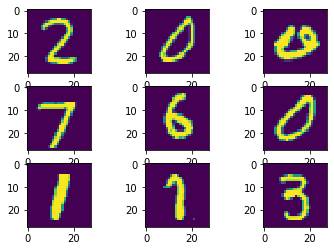

In [3]:
random_ = np.random.randint(0,Xtrain.shape[0],size=9)
fig,ax = plt.subplots(3,3)
ax = ax.flatten()

for i,j in enumerate(random_):
    ax[i].imshow(Xtrain[j])

In [4]:
Xtrain = tf.keras.utils.normalize(Xtrain,axis=1)
Xtest = tf.keras.utils.normalize(Xtest,axis=1)

In [5]:
Xtrain = Xtrain.flatten().reshape(Xtrain.shape[0],-1).T
Xtest = Xtest.flatten().reshape(Xtest.shape[0],-1).T

In [6]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [7]:
ytrain = convert_to_one_hot(ytrain,10)
ytest = convert_to_one_hot(ytest,10)

In [8]:
from multilayer_perceptron import MLP

In [9]:
model = MLP(n_classes=10)

In [10]:
model.add_layer(neurons=100)
model.add_layer(neurons=100)
model.add_layer(neurons=50)
model.add_layer(neurons=10,activation='softmax')

In [11]:
a = Xtrain[:,:40000]
b = ytrain[:,:40000]

In [12]:
model.fit(a,b,batch_size=32,epochs=5)

Cost: 0.009744075044308952, Accuracy: 0.9545 
Cost: 0.005754893795222298, Accuracy: 0.96145 
Cost: 0.004904484693163972, Accuracy: 0.958525 
Cost: 0.00443654111422907, Accuracy: 0.954325 
Cost: 0.003958028050430642, Accuracy: 0.96775 


In [13]:
z = ((model.predict(a) == b).sum(axis=0) == 10).sum()

In [14]:
z/len((model.predict(a) == b).sum(axis=0))

0.96775

In [15]:
len((model.predict(a) == b).sum(axis=0))

40000

In [16]:
(a.max(axis=1,keepdims=True) == a)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])